<a href="https://colab.research.google.com/github/AndreyKuratov/project_mldm_21/blob/main/MLDM_proj_3_crt_imgs_version_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import soundfile as sf
import scipy.signal as signal
import os
from tqdm import tqdm

import os
import csv
import numpy as np
import pandas as pd
from pathlib import Path
from PIL import Image

import librosa as lb 
import librosa.display
import matplotlib.pyplot as plt
import IPython.display as ipd

from skimage.transform import resize
from scipy import stats

from sklearn.preprocessing import MinMaxScaler
from skimage.transform import resize

In [3]:
PATH_TO_DIR = '/content/drive/MyDrive/mldm21_project/'

1. Файл меток 

In [ ]:
data_pd_fp = pd.read_csv('/content/drive/MyDrive/mldm21_project/train_fp.csv')
data_pd_tp = pd.read_csv('/content/drive/MyDrive/mldm21_project/train_tp.csv')
aa = data_pd_fp['recording_id'].values
bb = data_pd_tp['recording_id'].values

In [ ]:
data_pd_tp

,recording_id,species_id,songtype_id,t_min,f_min,t_max,f_max
0,003bec244,14,1,44.5440,2531.250,45.1307,5531.25
1,006ab765f,23,1,39.9615,7235.160,46.0452,11283.40
2,007f87ba2,12,1,39.1360,562.500,42.2720,3281.25
3,0099c367b,17,4,51.4206,1464.260,55.1996,4565.04
4,009b760e6,10,1,50.0854,947.461,52.5293,10852.70
...,...,...,...,...,...,...,...
1211,fe8d9ac40,13,1,53.4720,93.750,54.0960,843.75
1212,fea6b438a,4,1,43.5787,2531.250,45.7653,4031.25
1213,ff2eb9ce5,0,1,15.2267,5906.250,16.0213,8250.00
1214,ffb8d8391,5,1,14.3467,4781.250,16.6987,10406.20


In [ ]:
PATH = '/content/drive/MyDrive/mldm21_project/train/'
files_tp = data_pd_tp.recording_id.unique()
files_fp = data_pd_fp.recording_id.unique()
PATH_TO_TP_FILES = [PATH+ifile+'.flac' for  ifile in files_tp]
PATH_TO_FP_FILES = [PATH+ifile+'.flac' for  ifile in files_fp]


In [ ]:
PATH_TO_FP_FILES[:3]

['/content/drive/MyDrive/mldm21_project/train/00204008d.flac',
 '/content/drive/MyDrive/mldm21_project/train/003b04435.flac',
 '/content/drive/MyDrive/mldm21_project/train/005f1f9a5.flac']

In [ ]:
PATH_TO_FILES
SR = 48000
N_FFT = 2048
HOP_L = 128
size_1 = 256
size_2 = 512

In [ ]:
ipath = PATH_TO_FILES[10]
signal, sr = lb.load(ipath, sr=SR)

In [ ]:
mel_signal = lb.feature.melspectrogram(signal,sr=SR,n_fft=N_FFT,hop_length=HOP_L)
stft = lb.core.stft(signal, hop_length=HOP_L, n_fft=N_FFT)
stft_ang = np.angle(stft, deg=False)
stft_am = np.abs(stft)
stft_re = np.real(stft)
stft_im = np.imag(stft)

log_mel = librosa.power_to_db(mel_signal, ref=np.max)
log_stft_am = librosa.power_to_db(stft_am, ref=np.max)
log_stft_re = librosa.power_to_db(stft_re, ref=np.max)
log_stft_im = librosa.power_to_db(stft_im, ref=np.max)
log_stft_ang = librosa.power_to_db(stft_ang, ref=np.max)


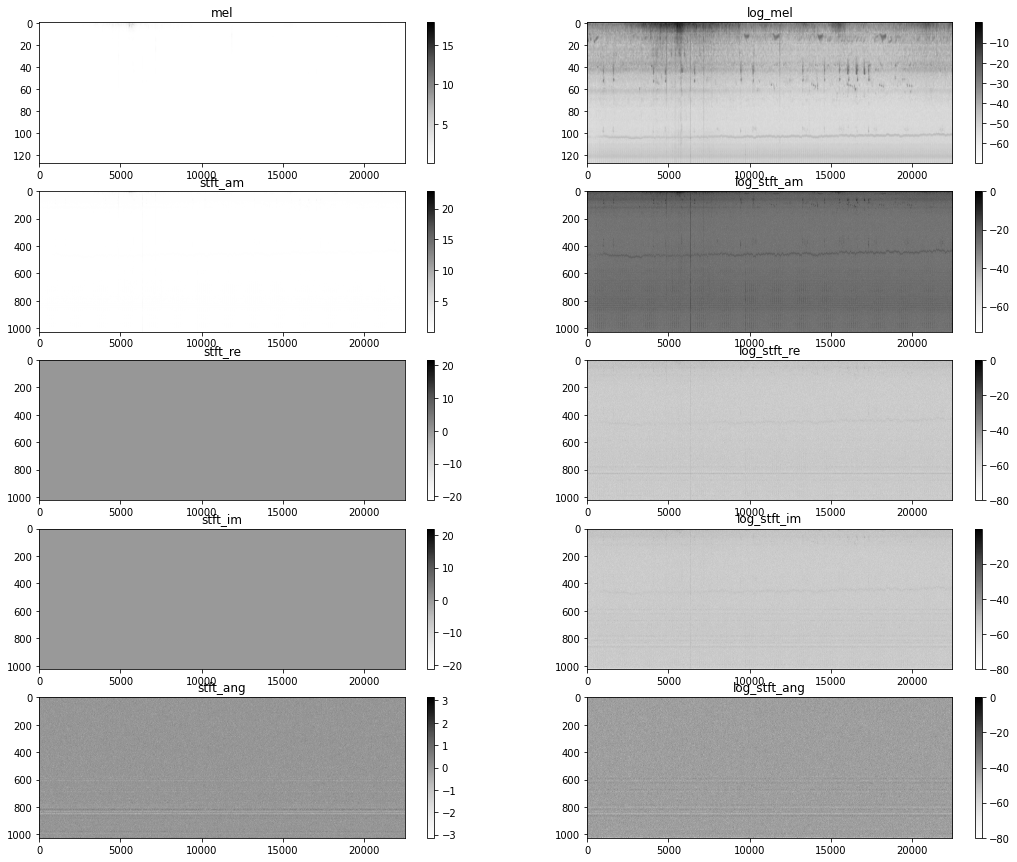

In [ ]:
plt.figure(figsize=(18,15))
plt.subplot(5,2,1)
plt.title('mel')
plt.imshow(mel_signal, cmap='Greys',aspect='auto')
plt.colorbar()
plt.subplot(5,2,2)
plt.title('log_mel')
plt.imshow(log_mel, cmap='Greys',aspect='auto')
plt.colorbar()

plt.subplot(5,2,3)
plt.title('stft_am')
plt.imshow(stft_am, cmap='Greys',aspect='auto')
plt.colorbar()
plt.subplot(5,2,4)
plt.title('log_stft_am')
plt.imshow(log_stft_am, cmap='Greys',aspect='auto')
plt.colorbar()

plt.subplot(5,2,5)
plt.title('stft_re')
plt.imshow(stft_re, cmap='Greys',aspect='auto')
plt.colorbar()
plt.subplot(5,2,6)
plt.title('log_stft_re')
plt.imshow(log_stft_re, cmap='Greys',aspect='auto')
plt.colorbar()

plt.subplot(5,2,7)
plt.title('stft_im')
plt.imshow(stft_im, cmap='Greys',aspect='auto')
plt.colorbar()
plt.subplot(5,2,8)
plt.title('log_stft_im')
plt.imshow(log_stft_im, cmap='Greys',aspect='auto')
plt.colorbar()

plt.subplot(5,2,9)
plt.title('stft_ang')
plt.imshow(stft_ang, cmap='Greys',aspect='auto')
plt.colorbar()
plt.subplot(5,2,10)
plt.title('log_stft_ang')
plt.imshow(log_stft_ang, cmap='Greys',aspect='auto')
plt.colorbar()

In [10]:


def scale_mm(log_m,max_value=255): 
  log_z = (log_m-np.min(log_m))/(np.max(log_m)-np.min(log_m))
  return (log_z*max_value).astype(int)


log_m = scale_mm(resize(log_mel,(256,512)))[::-1].T[None,:].copy()
log_am = scale_mm(resize(log_stft_am,(256,512)))[::-1].T[None,:].copy()
log_ang = scale_mm(resize(log_stft_ang,(256,512)))[::-1].T[None,:].copy()
img = np.concatenate([log_m,log_am,log_ang],axis=0)
img = img.T

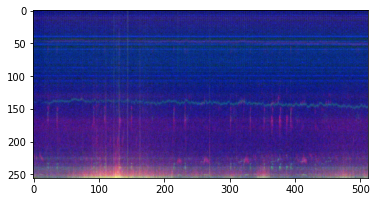

In [ ]:
plt.imshow(img.T)

Функция создающая кртинки

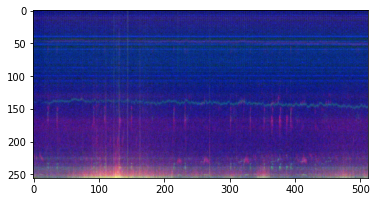

тестовые файлы

In [7]:
PATH_TO_TEST = '/content/drive/MyDrive/mldm21_project/test/'
path_to_test_files = [] 
labels_test = []
for itouple in os.walk(PATH_TO_TEST):
  root = itouple[0]
  files_test = itouple[2]
  for ifile in files_test:
    path_to_test_files.append(root+ifile)
    labels_test.append(ifile.split('.')[0])

In [12]:
def scale_mm(log_m,max_value=255): 
  log_z = (log_m-np.min(log_m))/(np.max(log_m)-np.min(log_m))
  return (log_z*max_value).astype(int)

SR = 48000
N_FFT = 2048
HOP_L = 512
SIZE_1 = 256
SIZE_2 = 512

label_data = labels_test.copy()
img_data = []

for ipath in tqdm(path_to_test_files):
  signal, sr = lb.load(ipath, sr=SR)

  mel_signal = lb.feature.melspectrogram(signal,sr=SR,n_fft=N_FFT,hop_length=HOP_L)
  stft = lb.core.stft(signal, hop_length=HOP_L, n_fft=N_FFT)
  stft_ang = np.angle(stft, deg=False)
  stft_am = np.abs(stft)

  log_mel = librosa.power_to_db(mel_signal, ref=np.max)
  log_stft_am = librosa.power_to_db(stft_am, ref=np.max)
  log_stft_ang = librosa.power_to_db(stft_ang, ref=np.max)

  log_m = scale_mm(resize(log_mel,(SIZE_1,SIZE_2)))[::-1].T[None,:].copy()
  log_am = scale_mm(resize(log_stft_am,(SIZE_1,SIZE_2)))[::-1].T[None,:].copy()
  log_ang = scale_mm(resize(log_stft_ang,(SIZE_1,SIZE_2)))[::-1].T[None,:].copy()
  img = np.concatenate([log_m,log_am,log_ang],axis=0)
  img_data.append(img.T)



100%|██████████| 1992/1992 [50:55<00:00,  1.53s/it]


In [13]:
PATH_TO_SAVE = '/content/drive/MyDrive/mldm21_project/'
img_data_np = np.array(img_data,dtype='uint8')
#SR = 48000
#N_FFT = 2048
#HOP_L = 512

np.savez(PATH_TO_SAVE+'sr_48e3_nfft_2e11_hlop_2e9_pict_256x512_u8_majorTest', imgs=img_data_np, labels=label_data)

TP и FP файлы

In [ ]:
def scale_mm(log_m,max_value=255): 
  log_z = (log_m-np.min(log_m))/(np.max(log_m)-np.min(log_m))
  return (log_z*max_value).astype(int)


data_pd_tp = pd.read_csv('/content/drive/MyDrive/mldm21_project/train_tp.csv')
data_pd_fp = pd.read_csv('/content/drive/MyDrive/mldm21_project/train_fp.csv')

files_tp = data_pd_tp.recording_id.unique()
files_fp = data_pd_fp.recording_id.unique()

PATH = '/content/drive/MyDrive/mldm21_project/train/'

PATH_TO_TP_FILES = [PATH+ifile+'.flac' for  ifile in files_tp]
PATH_TO_FP_FILES = [PATH+ifile+'.flac' for  ifile in files_fp]

label_data = files_fp.copy()
img_data = []

SR = 48000
N_FFT = 2048
HOP_L = 512
SIZE_1 = 256
SIZE_2 = 512


for ipath in tqdm(PATH_TO_FP_FILES):
  signal, sr = lb.load(ipath, sr=SR)

  mel_signal = lb.feature.melspectrogram(signal,sr=SR,n_fft=N_FFT,hop_length=HOP_L)
  stft = lb.core.stft(signal, hop_length=HOP_L, n_fft=N_FFT)
  stft_ang = np.angle(stft, deg=False)
  stft_am = np.abs(stft)

  log_mel = librosa.power_to_db(mel_signal, ref=np.max)
  log_stft_am = librosa.power_to_db(stft_am, ref=np.max)
  log_stft_ang = librosa.power_to_db(stft_ang, ref=np.max)

  log_m = scale_mm(resize(log_mel,(SIZE_1,SIZE_2)))[::-1].T[None,:].copy()
  log_am = scale_mm(resize(log_stft_am,(SIZE_1,SIZE_2)))[::-1].T[None,:].copy()
  log_ang = scale_mm(resize(log_stft_ang,(SIZE_1,SIZE_2)))[::-1].T[None,:].copy()
  img = np.concatenate([log_m,log_am,log_ang],axis=0)
  img_data.append(img.T)


 13%|█▎        | 517/3958 [15:56<1:38:20,  1.71s/it]

In [ ]:
img_data_np = np.array(img_data,dtype='uint8')

In [ ]:
img_data_np.shape

(1132, 256, 512, 3)

In [ ]:
label_data.shape

(1132,)

In [ ]:
PATH_TO_SAVE = '/content/drive/MyDrive/mldm21_project/'

#SR = 48000
#N_FFT = 2048
#HOP_L = 512

np.savez(PATH_TO_SAVE+'sr_48e3_nfft_2e11_hlop_2e9_pict_256x512_u8', imgs=img_data_np, labels=label_data)

In [ ]:
data = np.load(PATH_TO_SAVE+'sr_48e3_nfft_2e11_hlop_2e9_pict_256x512_u8.npz',allow_pickle=True)

In [ ]:
data['imgs']

array([[[[ 26,  40, 136],
         [ 21,  50, 201],
         [ 28,  53, 129],
         ...,
         [ 24,  39, 161],
         [ 17,  47, 170],
         [ 15,  28, 206]],

        [[ 26,  34, 108],
         [ 21,  25, 176],
         [ 28,  32, 123],
         ...,
         [ 24,  39, 103],
         [ 17,  34, 124],
         [ 15,  30, 129]],

        [[ 26,  32,  87],
         [ 21,  31, 111],
         [ 28,  43, 150],
         ...,
         [ 28,  41, 150],
         [ 20,  43, 154],
         [ 14,  41, 128]],

        ...,

        [[136, 130,  88],
         [116, 122, 126],
         [109, 114, 128],
         ...,
         [126, 137, 137],
         [129, 147, 144],
         [138, 154, 135]],

        [[159, 170, 129],
         [115, 154, 112],
         [ 97, 146, 111],
         ...,
         [ 99, 159, 146],
         [110, 168,  87],
         [117, 177, 122]],

        [[159, 183,  28],
         [115, 150,  43],
         [ 97, 128,   0],
         ...,
         [ 99, 125, 117],
        